From pystan quick start [guide](https://pystan.readthedocs.io/en/latest/getting_started.html).

In [1]:
import arviz
import pystan

In [2]:
%matplotlib inline

In [3]:
sm = pystan.StanModel(file='../stan/8schools.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4337cb01f5c9774a0dd265dcc01c105e NOW.


In [4]:
schools_dat = {
    'J': 8,
    'y': [28,  8, -3,  7, -1,  1, 18, 12],
    'sigma': [15, 10, 16, 11,  9, 11, 10, 18],
}

In [5]:
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

In [6]:
la = fit.extract(permuted=True)  # return a dictionary of arrays
mu = la['mu']
## return an array of three dimensions: iterations, chains, parameters
a = fit.extract(permuted=False)

In [7]:
print(fit)

Inference for Stan model: anon_model_4337cb01f5c9774a0dd265dcc01c105e.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         7.97    0.15   5.07  -2.54   4.75   8.16  11.24   17.5   1196    1.0
tau        6.39    0.19   5.15   0.23   2.55   5.34   8.85  19.45    703    1.0
eta[1]     0.41    0.02   0.92  -1.44  -0.17   0.41   1.01   2.18   1908    1.0
eta[2]    -0.02    0.02   0.86  -1.79  -0.59  -0.04   0.55   1.66   2183    1.0
eta[3]    -0.22    0.02   0.96  -2.15  -0.86  -0.23   0.43   1.78   1901    1.0
eta[4]    -0.04    0.02    0.9  -1.81  -0.65  -0.03   0.54   1.76   2057    1.0
eta[5]    -0.36    0.02   0.89  -2.05  -0.98  -0.37    0.2   1.49   1702    1.0
eta[6]    -0.21    0.02   0.92   -2.0  -0.84   -0.2   0.38   1.63   1968    1.0
eta[7]     0.36    0.02   0.88  -1.46  -0.18   0.38   0.95   2.03   1978    1.0
eta[8]     0.

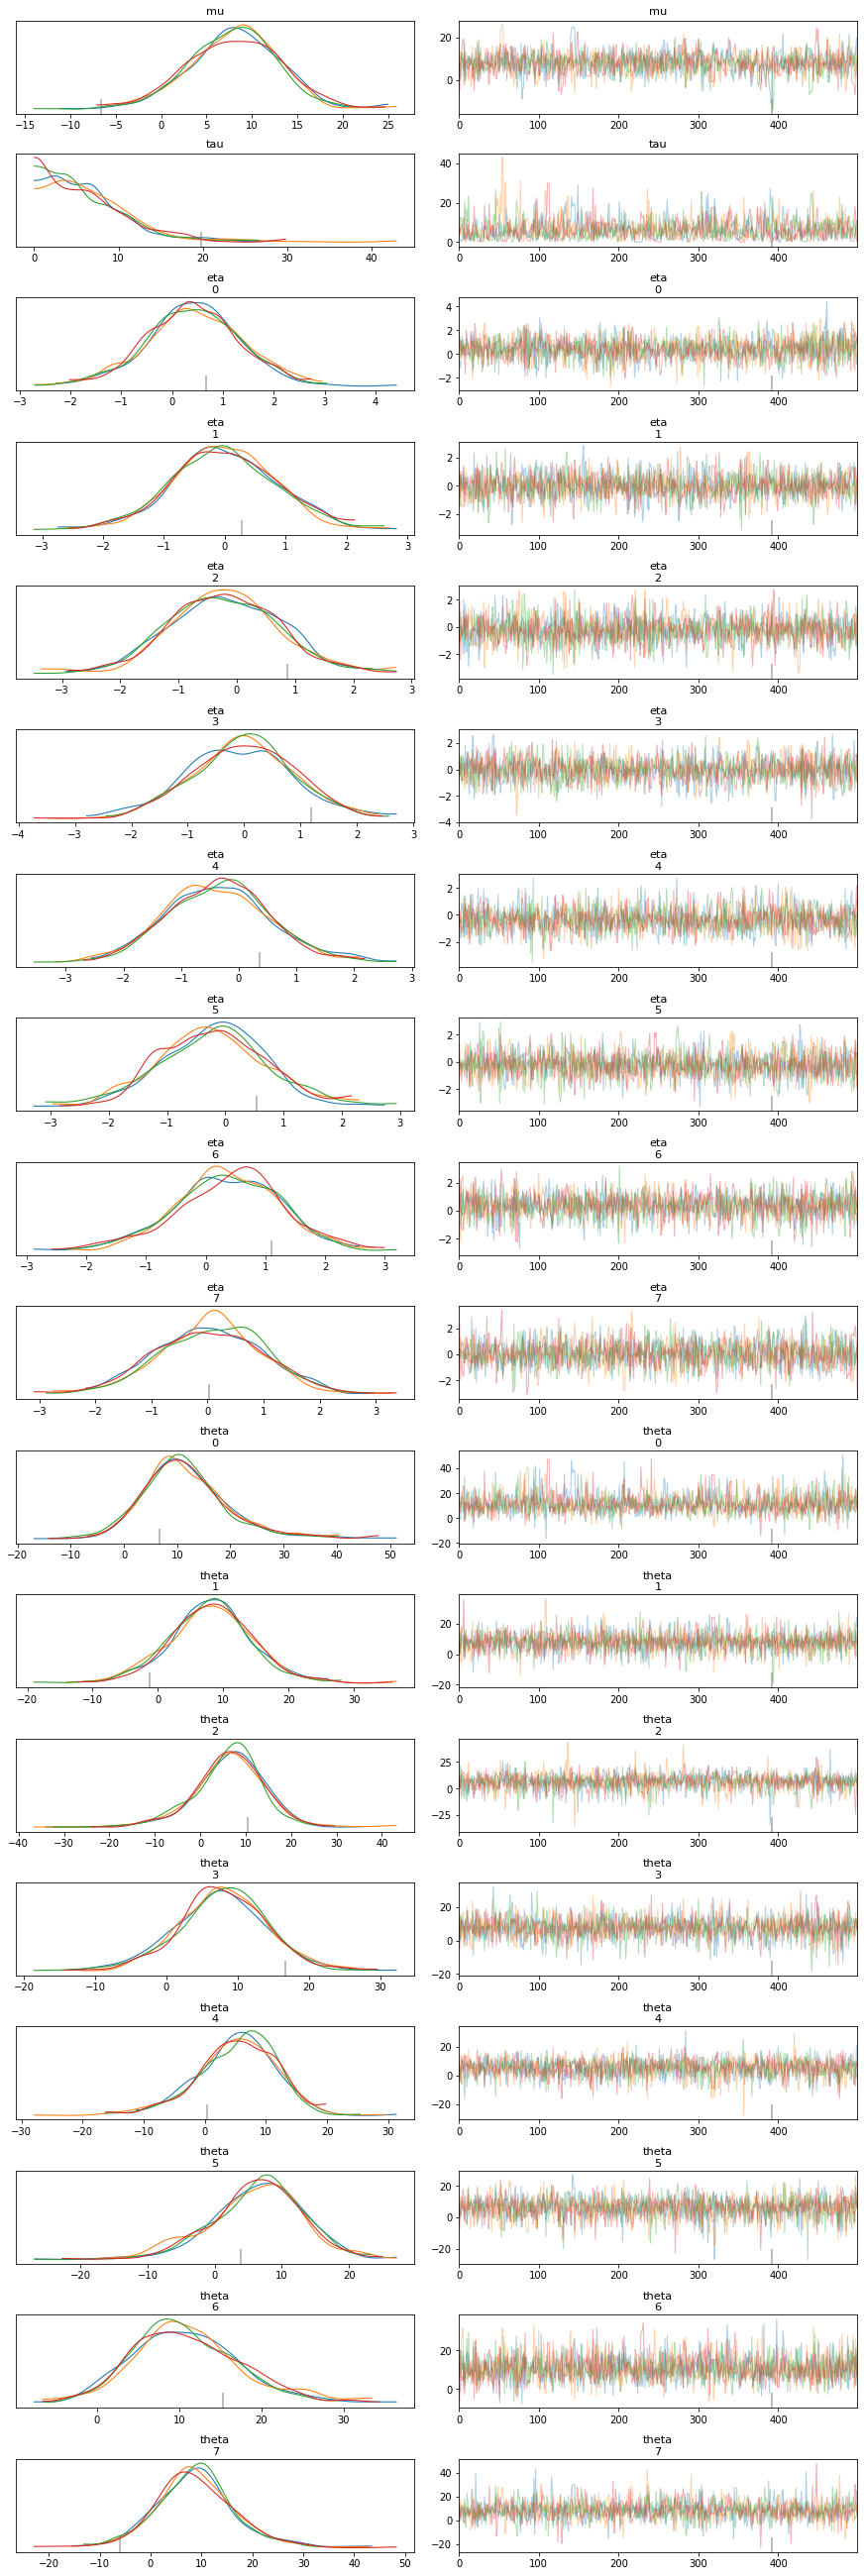

In [9]:
arviz.plot_trace(fit);